# **Title: EDA for sales dataset for an Online store during the period from 1/1/2019 to 31/12/2019**


# **Stage 0: Exploring the given data**

* **Import the required modules.**

In [729]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* **Import the dataset and start exploring.**

In [730]:
df = pd.read_csv('all_data.csv')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


* **Number of rows and columns in this dataset.**

In [731]:
df.shape

(186850, 6)

* **Information about every column's data type.**

In [732]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


* **Columns names.**

In [733]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

* **Number of NaN values for each column.**

In [734]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [735]:
df.loc[df.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"
186785,259297,Lightning Charging Cable,1,14.95,09/15/19 18:54,"138 Main St, Boston, MA 02215"


* **List of unique values in `Product` column.**

In [736]:
df.Product.unique()

array(['USB-C Charging Cable', nan, 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor',
       'Product'], dtype=object)

In [737]:
df.Product.value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Product                         355
Name: Product, dtype: int64

* **Generate descriptive statistics.**

In [738]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


* **Number of unique values in each column.**

In [739]:
df.nunique()

Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              24
Order Date          142396
Purchase Address    140788
dtype: int64

# **Stage 1: Assessing the data.**

> **Content issues detected:**

* **NaN Values** :
  * There are 545 NaN values. These values sgould be removed to ensure that the dataset is completely clean.
* **Data Entry errors** :
  * in **`Product`** column, There are 355 values with the name 'Product' . This should be a *data entry error* from combining table in csv file manually.
  * Another issue in the same column; there are some items duplicated in the same order for no reason. Maybe it's another software crash or data entry error, whatever.
* **Duplicated values** :
  * These duplicated values are Combination of NaN values and data entry errors.

> **Data type issues detected:**

* **`Quantity Ordered`** column :
  * should be changed to integer to count the total number of each product.
* **`Price Each`** column :
  * should be changed to float to count the total sales for each product.
* **`Order Date`** column:
  * should be changed to datetime to do some calucaltions about the preffered time of day or month or year, time classification calculations at all.
* New columns can be created:
  * **`ZIP Code`** column:
   * Contains a five-digit number extracted from `Purchase Address` column, represents the mail box for every area, and can be helpful when sending the product using postal address.
  * **`State`** Column:
   * to help in doing stats about sales in every state.
  * **`Day of week`** Column: 
   * to help in doing stats about the preffered day of week for order decision.
  * **`Hour of day`** Column:
   * to give information about the most frequent time of day to make an order.

> **I think it's all clear now about issues and how to fix it. One stage left before starting doing data science job; Cleaning the data.**

# **Stage 2: Cleaning the data.**

* **Taking a copy of the dataset to perform the cleaning process without changing the real data**

In [740]:
df_clean = df.copy()
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


> ## **Fixing content issues:**

> **Step 1: Removing data-entry-error values:**

In [741]:
df_clean.loc[df_clean.duplicated()].sort_values('Order Date',ascending = False)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
93325,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
86722,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
91799,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
91178,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
89951,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


* **Displaying the Duplicated values together:**

*Roughly speaking, these values ​​are duplicated because the data entry specialist has stitched the sales tables together as new values ​​with new indexes, ignoring the row and column order.*

In [742]:
df_clean.loc[df_clean['Product']=='Product']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


* **Drop the previous values out of the dataset**

In [743]:
df_clean.drop(df_clean.index[df_clean['Product'] == 'Product'], inplace = True)

* **Check if it's done or not.**

In [744]:
df_clean.loc[df_clean['Product']=='Product']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


*It seems like it's done, so we can jump into the next step!*

> **Step 2: Removing NaN values:**

* **Displaying NaN values together**

In [745]:
df_clean.loc[df_clean['Order ID'].isnull()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


* **Deleting NaN values**

In [746]:
df_clean.dropna(inplace=True)

In [747]:
df_clean.loc[df_clean['Order ID'].isnull()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


>  **Cool ; to the last step, before we start our EDA!!!**

> **Step 3: Removing duplicated values.**

* **Search for duplicated values:**

In [748]:
df_clean.groupby(['Order ID','Product'])['Order ID'].count().nlargest()

Order ID  Product                 
142071    AA Batteries (4-pack)       2
145143    Lightning Charging Cable    2
146765    Google Phone                2
147707    Wired Headphones            2
148984    USB-C Charging Cable        2
Name: Order ID, dtype: int64

As an example, let's search with random `Order ID` value:

In [749]:
df_clean.loc[df_clean['Order ID']=='142071']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
68421,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"
68422,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"


That's another big issue that makes the the data somekind missleading, so it's a must to drop these duplicated values.

In [750]:
df_clean.drop_duplicates(subset=['Order ID','Product'],keep='first',inplace=True)

In [751]:
df_clean.groupby(['Order ID','Product'])['Order ID'].count()

Order ID  Product                   
141234    iPhone                        1
141235    Lightning Charging Cable      1
141236    Wired Headphones              1
141237    27in FHD Monitor              1
141238    Wired Headphones              1
                                       ..
319666    Lightning Charging Cable      1
319667    AA Batteries (4-pack)         1
319668    Vareebadd Phone               1
319669    Wired Headphones              1
319670    Bose SoundSport Headphones    1
Name: Order ID, Length: 185639, dtype: int64

In [752]:
df_clean.loc[df_clean['Order ID']=='142071']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
68421,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"


> **Now, finally we can say: WE HAVE CLEAN DATA 100%, but one another issue still not fixed: changing data types in some columns,and creating new columns to make your EDA more easier.** 

> ## **fixing data type issues:**

In [753]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185639 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185639 non-null  object
 1   Product           185639 non-null  object
 2   Quantity Ordered  185639 non-null  object
 3   Price Each        185639 non-null  object
 4   Order Date        185639 non-null  object
 5   Purchase Address  185639 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


> **Step 1: changing some columns to the appropriate data type.**

In [754]:
df_clean['Order Date']=pd.to_datetime(df_clean['Order Date'],errors='coerce')

In [755]:
df_clean['Price Each']= pd.to_numeric(df_clean['Price Each'])

In [756]:
df_clean['Quantity Ordered']=df_clean['Quantity Ordered'].astype(int)

> **Step 2: Creating new columns.**

* **Creating `ZIP Code` column.**

In [757]:
df_clean['ZIP Code']=df_clean['Purchase Address'].str[-6:]

* **Editing `Purchase Address` column.**

In [758]:
df_clean['Purchase Address']=df_clean['Purchase Address'].str[:-6]

* **Creating `State` column.**

In [759]:
df_clean['State']=df_clean['Purchase Address'].str[-2:]
df_clean['State']=df_clean['State'].astype('category')

* **Creating `Order Year` column.**

In [760]:
df_clean['Order Year']=df_clean['Order Date'].dt.year
df_clean['Order Year']=df_clean['Order Year'].astype('category')

* **Creating `Order Month` column.**

In [761]:
df_clean['Order Month']=df_clean['Order Date'].dt.month
df_clean['Order Month']=df_clean['Order Month'].astype('category')

* **Creating `Order Day of Week` column.**

In [762]:
df_clean['Order Day of Week']=df_clean['Order Date'].dt.dayofweek

* **Creating `Order Hour of Day` column.**

In [763]:
df_clean['Order Hour of Day']=df_clean['Order Date'].dt.hour
df_clean['Order Hour of Day']=df_clean['Order Hour of Day'].astype(int)

> **Display the dataset in its clean state.**

In [764]:
df_clean

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,ZIP Code,State,Order Year,Order Month,Order Day of Week,Order Hour of Day
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX",75001,TX,2019,4,4,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA",02215,MA,2019,4,6,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA",90001,CA,2019,4,4,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA",90001,CA,2019,4,4,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA",90001,CA,2019,4,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA",90001,CA,2019,9,1,20
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA",94016,CA,2019,9,6,16
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA",94016,CA,2019,9,0,7
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA",94016,CA,2019,9,3,17


> **The dataset ordered by `Order Date`.**

In [765]:
df_clean = df_clean.sort_values('Order Date')
df_clean.reset_index(drop=True,inplace=True)
df_clean

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,ZIP Code,State,Order Year,Order Month,Order Day of Week,Order Hour of Day
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY",10001,NY,2019,1,1,3
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA",94016,CA,2019,1,1,3
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY",10001,NY,2019,1,1,4
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX",75001,TX,2019,1,1,5
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA",30301,GA,2019,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
185634,304165,AAA Batteries (4-pack),1,2.99,2020-01-01 04:13:00,"825 Adams St, Portland, OR",97035,OR,2020,1,2,4
185635,299125,USB-C Charging Cable,1,11.95,2020-01-01 04:21:00,"754 Hickory St, New York City, NY",10001,NY,2020,1,2,4
185636,305840,Bose SoundSport Headphones,1,99.99,2020-01-01 04:54:00,"784 River St, San Francisco, CA",94016,CA,2020,1,2,4
185637,300519,Lightning Charging Cable,1,14.95,2020-01-01 05:13:00,"657 Spruce St, New York City, NY",10001,NY,2020,1,2,5


> For more accurate analysis, we need to drop the values with date: `2020-01-01` to have the data for a complete year.

In [766]:
df_clean.loc[df_clean['Order Year']==2020].count()[0]

34

In [767]:
df_clean.drop(df_clean.index[df_clean['Order Year'] ==2020], inplace = True)

In [768]:
df_clean

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,ZIP Code,State,Order Year,Order Month,Order Day of Week,Order Hour of Day
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY",10001,NY,2019,1,1,3
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA",94016,CA,2019,1,1,3
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY",10001,NY,2019,1,1,4
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX",75001,TX,2019,1,1,5
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA",30301,GA,2019,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
185600,298406,AAA Batteries (4-pack),2,2.99,2019-12-31 23:42:00,"30 Elm St, San Francisco, CA",94016,CA,2019,12,1,23
185601,297481,AA Batteries (4-pack),1,3.84,2019-12-31 23:42:00,"82 Hill St, Dallas, TX",75001,TX,2019,12,1,23
185602,317048,AAA Batteries (4-pack),2,2.99,2019-12-31 23:45:00,"743 Adams St, San Francisco, CA",94016,CA,2019,12,1,23
185603,309773,AAA Batteries (4-pack),1,2.99,2019-12-31 23:52:00,"60 Hickory St, Los Angeles, CA",90001,CA,2019,12,1,23


In [769]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185605 entries, 0 to 185604
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Order ID           185605 non-null  object        
 1   Product            185605 non-null  object        
 2   Quantity Ordered   185605 non-null  int32         
 3   Price Each         185605 non-null  float64       
 4   Order Date         185605 non-null  datetime64[ns]
 5   Purchase Address   185605 non-null  object        
 6   ZIP Code           185605 non-null  object        
 7   State              185605 non-null  category      
 8   Order Year         185605 non-null  category      
 9   Order Month        185605 non-null  category      
 10  Order Day of Week  185605 non-null  int64         
 11  Order Hour of Day  185605 non-null  int32         
dtypes: category(3), datetime64[ns](1), float64(1), int32(2), int64(1), object(4)
memory usage: 13.3+ MB


In [770]:
df_clean.duplicated().sum()

0

In [771]:
df_clean.isnull().sum()

Order ID             0
Product              0
Quantity Ordered     0
Price Each           0
Order Date           0
Purchase Address     0
ZIP Code             0
State                0
Order Year           0
Order Month          0
Order Day of Week    0
Order Hour of Day    0
dtype: int64

In [772]:
df_clean.describe()

,Quantity Ordered,Price Each,Order Day of Week,Order Hour of Day
count,185605.000000,185605.000000,185605.000000,185605.000000
mean,1.124372,184.552460,2.991805,14.415414
std,0.442686,332.864951,2.002165,5.421056
min,1.000000,2.990000,0.000000,0.000000
25%,1.000000,11.950000,1.000000,11.000000
50%,1.000000,14.950000,3.000000,15.000000
75%,1.000000,150.000000,5.000000,19.000000
max,9.000000,1700.000000,6.000000,23.000000


# **Stage 3: Exploratory Data Analysis (EDA) and Data Visualization**

## **Setting some parameters for a better data visualization**

In [910]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE,figsize=(15,7.5))  # fontsize of the figure title and figure size


## **Research Question 0: How many orders are made in 2019?**

In [774]:
df_clean['Order ID'].nunique()

178406

## **Research Question 1: How much was the total sales value during 2019?**

In [775]:
df_clean['Price Each'].sum()

34253859.33999999

## **Research Question 2: How much was the total sales for each month?**

In [776]:
df_clean.groupby(['Order Month'])['Price Each'].sum().astype(int)

Order Month
1     1802421
2     2186904
3     2789065
4     3366208
5     3133079
6     2560488
7     2631210
8     2226945
9     2081885
10    3713564
11    3178847
12    4583237
Name: Price Each, dtype: int32

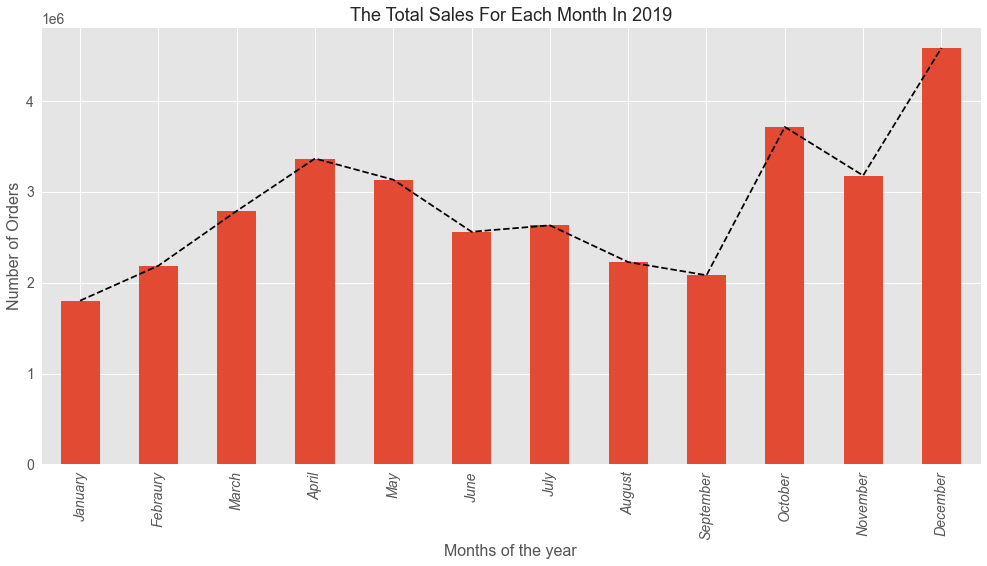

In [828]:
df_clean.groupby(['Order Month'])['Price Each'].sum().astype(int).plot(kind='line',color = 'black',linestyle = '--',figsize = (15,7.5))
df_clean.groupby(['Order Month'])['Price Each'].sum().astype(int).plot(kind='bar')
plt.xticks(np.arange(0,12,1),labels=['January','Febraury','March','April','May','June','July','August','September','October','November','December'],fontstyle = 'oblique')
plt.xlabel('Months of the year')
plt.ylabel('Number of Orders')
plt.title('The Total Sales For Each Month In 2019')
plt.show()

## **Research Question 3: How many pieces did the store sell during 2019?**

In [778]:
df_clean['Quantity Ordered'].sum()

208689

## **Research Question 4: What is the most requested item from the store?**

In [862]:
df_clean.groupby(['Product'])['Product'].count().nlargest(20)

Product
USB-C Charging Cable          21851
Lightning Charging Cable      21599
AAA Batteries (4-pack)        20590
AA Batteries (4-pack)         20542
Wired Headphones              18846
Apple Airpods Headphones      15521
Bose SoundSport Headphones    13295
27in FHD Monitor               7495
iPhone                         6838
27in 4K Gaming Monitor         6224
34in Ultrawide Monitor         6174
Google Phone                   5521
Flatscreen TV                  4793
Macbook Pro Laptop             4720
ThinkPad Laptop                4124
20in Monitor                   4096
Vareebadd Phone                2064
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

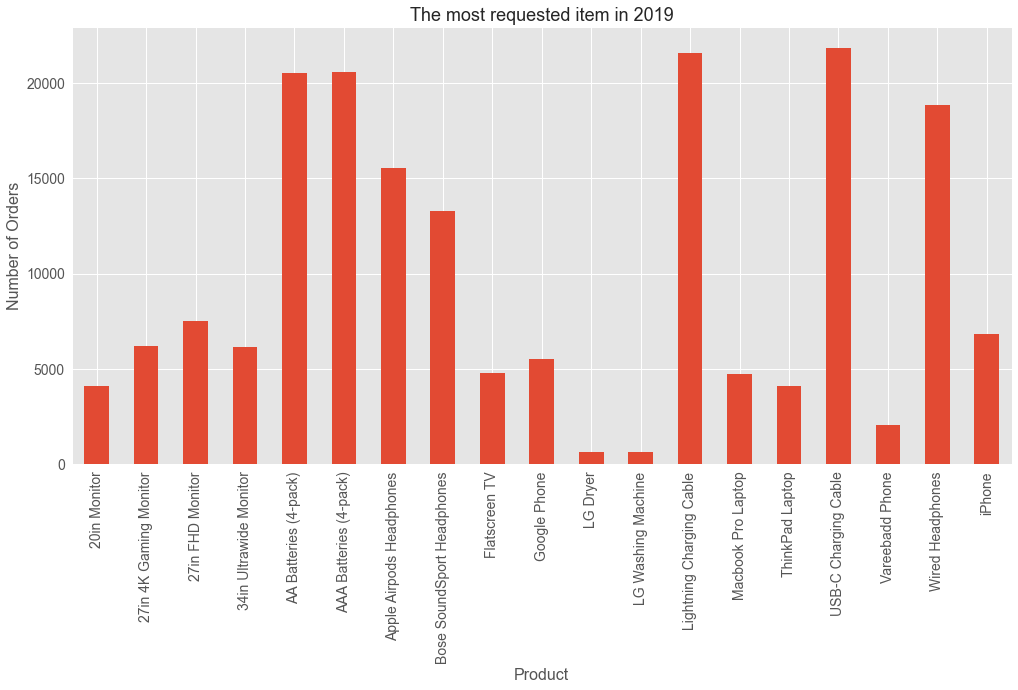

In [829]:
df_clean.groupby('Product')['Product'].count().plot(kind='bar',figsize=(15,7.5))
plt.title('The most requested item in 2019')
plt.ylabel('Number of Orders')
plt.show()

## **Research Question 5: How much did each item represent in total sales? And which piece was the highest share of sales?**

In [781]:
df_clean.groupby('Product')['Price Each'].sum().nlargest(20)

Product
Macbook Pro Laptop            8024000.00
iPhone                        4786600.00
ThinkPad Laptop               4123958.76
Google Phone                  3312600.00
27in 4K Gaming Monitor        2427297.76
34in Ultrawide Monitor        2346058.26
Apple Airpods Headphones      2328150.00
Flatscreen TV                 1437900.00
Bose SoundSport Headphones    1329367.05
27in FHD Monitor              1124175.05
Vareebadd Phone                825600.00
20in Monitor                   450519.04
LG Washing Machine             399600.00
LG Dryer                       387600.00
Lightning Charging Cable       322905.05
USB-C Charging Cable           261119.45
Wired Headphones               225963.54
AA Batteries (4-pack)           78881.28
AAA Batteries (4-pack)          61564.10
Name: Price Each, dtype: float64

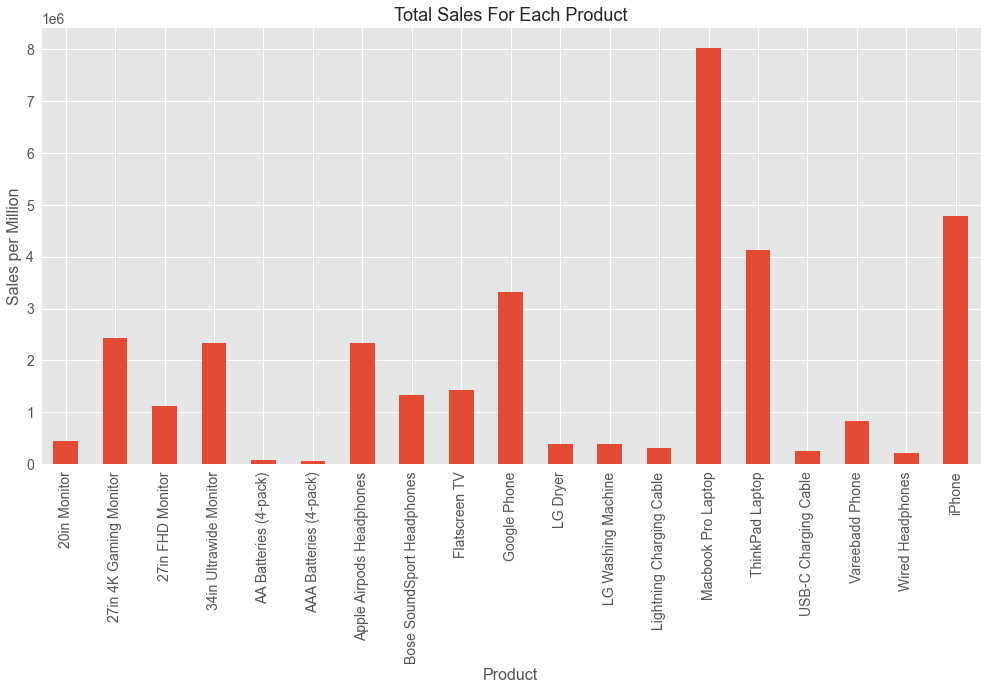

In [830]:
df_clean.groupby('Product')['Price Each'].sum().plot(kind='bar',figsize = (15,7.5))
plt.title('Total Sales For Each Product')
plt.ylabel('Sales per Million')
plt.show()

## **Research Question 6: How much was each state's share of the purchases?**

In [831]:
df_clean.groupby(['State'])['Price Each'].sum().astype(int)

State
CA    13617719
GA     2778589
MA     3633039
ME      446740
NY     4631592
OR     1859658
TX     4556095
WA     2730423
Name: Price Each, dtype: int32

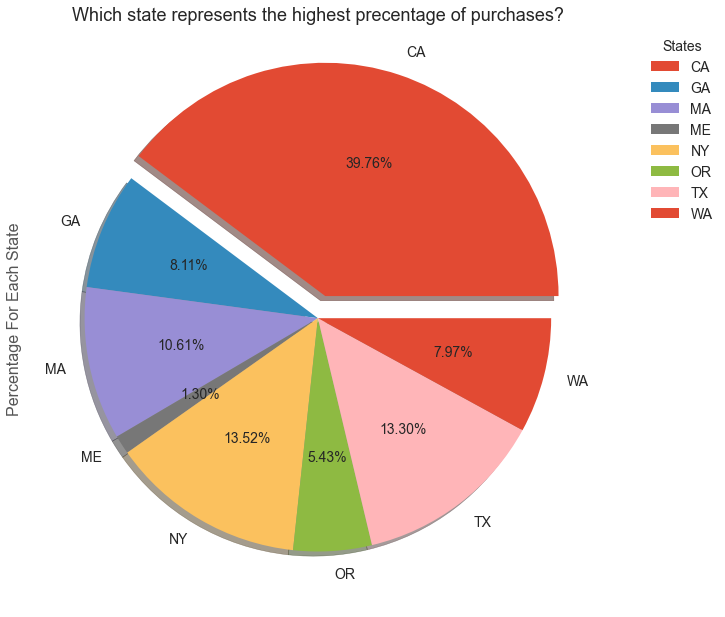

In [854]:
df_clean.groupby(['State'])['Price Each'].sum().astype(int).plot(kind='pie',figsize=(15,10),shadow=True,autopct='%.2f%%',explode = [0.1,0,0,0,0,0,0,0])
plt.ylabel('Percentage For Each State')
plt.title('Which state represents the highest precentage of purchases?')
plt.legend(title='States', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## **Research Question 7: What are the details of the biggest order?**

In [832]:
df_clean['Order ID'].value_counts()

160873    5
235798    4
312407    4
304802    4
194253    4
         ..
319640    1
259476    1
214594    1
187761    1
197595    1
Name: Order ID, Length: 178406, dtype: int64

In [833]:
df_clean.loc[df_clean['Order ID']=='160873']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,ZIP Code,State,Order Year,Order Month,Order Day of Week,Order Hour of Day
13515,160873,Google Phone,1,600.00,2019-02-10 10:24:00,"702 River St, San Francisco, CA",94016,CA,2019,2,6,10
13516,160873,iPhone,1,700.00,2019-02-10 10:24:00,"702 River St, San Francisco, CA",94016,CA,2019,2,6,10
13517,160873,Wired Headphones,1,11.99,2019-02-10 10:24:00,"702 River St, San Francisco, CA",94016,CA,2019,2,6,10
13518,160873,Lightning Charging Cable,1,14.95,2019-02-10 10:24:00,"702 River St, San Francisco, CA",94016,CA,2019,2,6,10
13519,160873,Apple Airpods Headphones,1,150.00,2019-02-10 10:24:00,"702 River St, San Francisco, CA",94016,CA,2019,2,6,10


## **Research Question 8: Where is the address where the biggest number of purchases have been delivered?**

In [834]:
df_clean.groupby(['Purchase Address'])['Purchase Address'].count().nlargest()

Purchase Address
193 Forest St, San Francisco, CA    9
223 Elm St, Los Angeles, CA         8
279 Sunset St, San Francisco, CA    8
176 North St, San Francisco, CA     7
284 Walnut St, San Francisco, CA    7
Name: Purchase Address, dtype: int64

In [788]:
df_clean.loc[df_clean['Purchase Address']=='193 Forest St, San Francisco, CA'].sort_values('Purchase Address')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,ZIP Code,State,Order Year,Order Month,Order Day of Week,Order Hour of Day
45792,176834,Lightning Charging Cable,1,14.95,2019-04-15 20:42:00,"193 Forest St, San Francisco, CA",94016,CA,2019,4,0,20
66756,204983,Wired Headphones,1,11.99,2019-05-22 21:48:00,"193 Forest St, San Francisco, CA",94016,CA,2019,5,2,21
76955,217225,Apple Airpods Headphones,1,150.00,2019-06-13 05:26:00,"193 Forest St, San Francisco, CA",94016,CA,2019,6,3,5
83214,216739,Google Phone,1,600.00,2019-06-26 21:39:00,"193 Forest St, San Francisco, CA",94016,CA,2019,6,2,21
98409,227007,USB-C Charging Cable,1,11.95,2019-07-29 23:04:00,"193 Forest St, San Francisco, CA",94016,CA,2019,7,0,23
98410,227007,27in FHD Monitor,1,149.99,2019-07-29 23:04:00,"193 Forest St, San Francisco, CA",94016,CA,2019,7,0,23
102100,239970,AA Batteries (4-pack),1,3.84,2019-08-08 11:35:00,"193 Forest St, San Francisco, CA",94016,CA,2019,8,3,11
170025,302746,Lightning Charging Cable,1,14.95,2019-12-12 20:50:00,"193 Forest St, San Francisco, CA",94016,CA,2019,12,3,20
170026,302746,iPhone,1,700.00,2019-12-12 20:50:00,"193 Forest St, San Francisco, CA",94016,CA,2019,12,3,20


## **Research Question 9: Which mailbox was the largest number of purchases sent to?**

In [810]:
df_clean.groupby(['ZIP Code'])['ZIP Code'].count().nlargest(10)

ZIP Code
 94016    44639
 90001    29559
 10001    24830
 02215    19891
 30301    14861
 75001    14790
 98101    14708
 97035     9992
 73301     9885
 04101     2450
Name: ZIP Code, dtype: int64

In [728]:
df_clean.loc[df_clean['ZIP Code']==' 94016']['Purchase Address'].unique()

array(['760 Church St, San Francisco, CA',
       '338 Chestnut St, San Francisco, CA',
       '53 River St, San Francisco, CA', ...,
       '723 South St, San Francisco, CA',
       '914 Madison St, San Francisco, CA',
       '876 Lincoln St, San Francisco, CA'], dtype=object)

In [791]:
df_clean.loc[df_clean['ZIP Code']==' 90001']['Purchase Address'].unique()

array(['456 5th St, Los Angeles, CA', '903 Willow St, Los Angeles, CA',
       '576 West St, Los Angeles, CA', ...,
       '144 Washington St, Los Angeles, CA',
       '9 South St, Los Angeles, CA', '60 Hickory St, Los Angeles, CA'],
      dtype=object)

In [792]:
df_clean.loc[df_clean['ZIP Code']==' 10001']['Purchase Address'].unique()

array(['9 Lake St, New York City, NY', '735 5th St, New York City, NY',
       '428 Highland St, New York City, NY', ...,
       '711 Lake St, New York City, NY', '513 Pine St, New York City, NY',
       '200 Jefferson St, New York City, NY'], dtype=object)

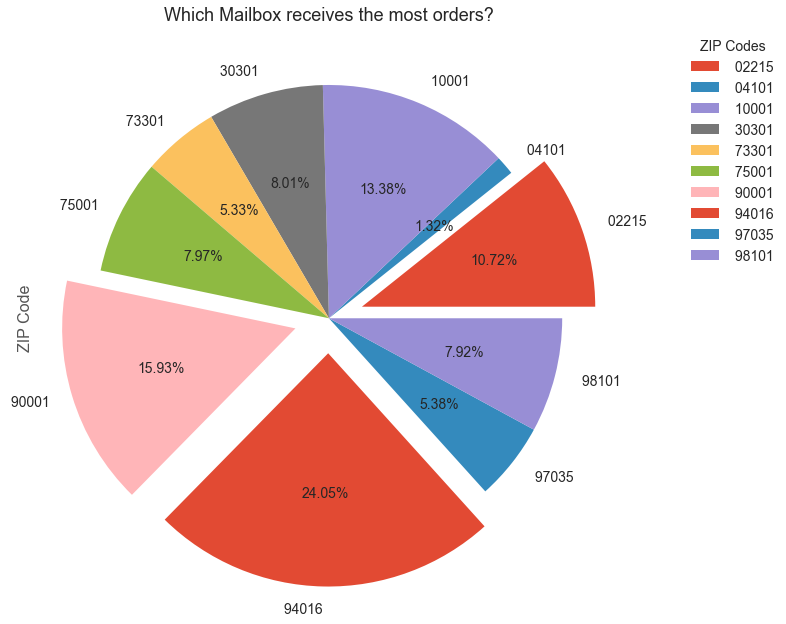

In [852]:
df_clean.groupby(['ZIP Code'])['ZIP Code'].count().plot(kind='pie',shadow=False,autopct='%.2f%%',explode = [0.15,0,0,0,0,0,0.15,0.15,0,0],figsize=(15,10))
plt.title('Which Mailbox receives the most orders?')
plt.legend(title='ZIP Codes', bbox_to_anchor=(1.1, 1), loc='upper left')
plt.show()

## **Research Question 10: What is the most popular day of the week on which products are purchased from the store?**

In [813]:
df_clean['Order Day of Week'].value_counts().nlargest(7)

1    27128
6    26511
0    26503
5    26448
3    26408
2    26396
4    26211
Name: Order Day of Week, dtype: int64

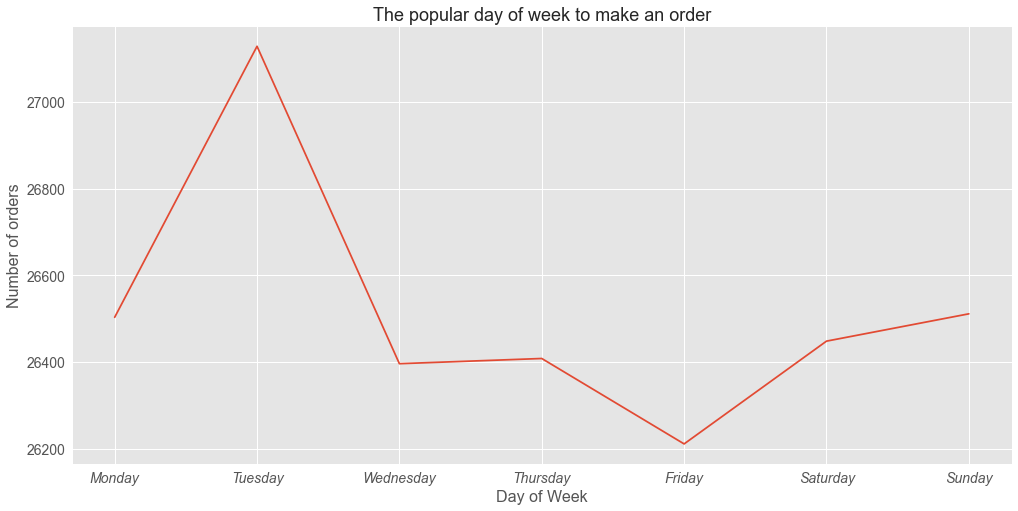

In [836]:
df_clean['Order Day of Week'].value_counts(sort=False).plot(kind='line')
plt.xticks(np.arange(0,7,1),labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],fontstyle = 'oblique')
plt.title('The popular day of week to make an order')
plt.xlabel('Day of Week')
plt.ylabel('Number of orders')
plt.show()

## **Research Question 11: What is the most popular time of the day on which products are purchased from the store?**

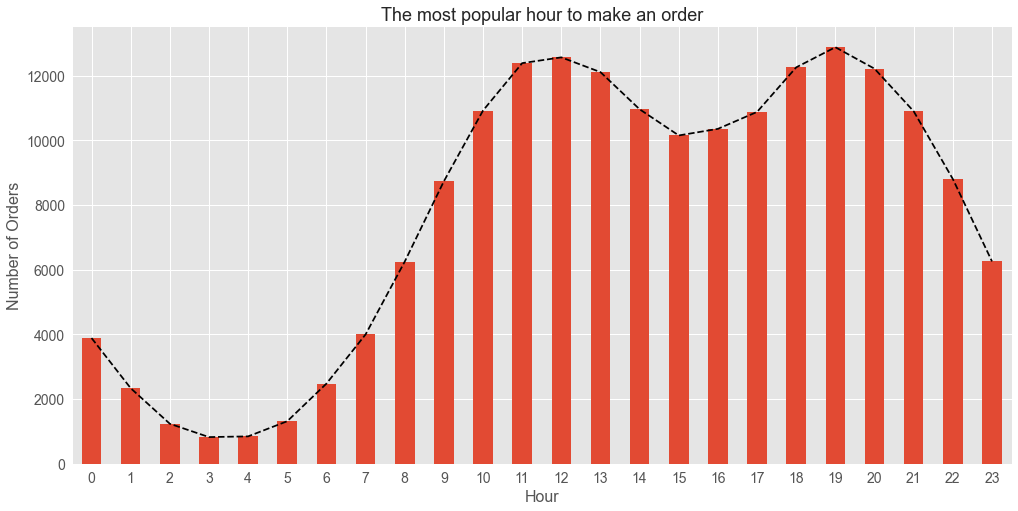

In [846]:
df_clean['Order Hour of Day'].value_counts(sort=False).plot(kind='bar')
df_clean['Order Hour of Day'].value_counts(sort=False).plot(kind='line',color = 'black',linestyle = '--')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.title("The most popular hour to make an order")
plt.show()

## **Research Question 12: Which smart phone is the most popular to be ordered?**

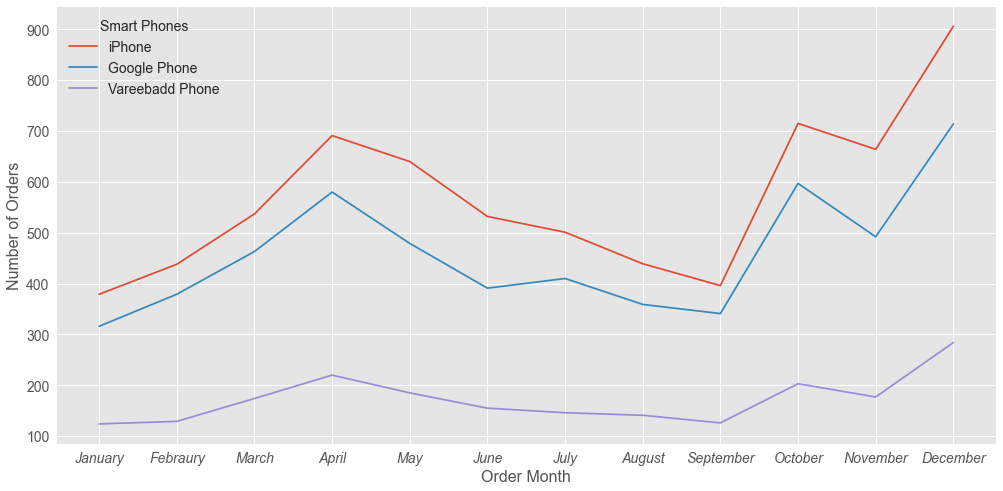

In [909]:
df_clean.loc[df_clean.Product=='iPhone'].groupby(['Order Month'])['Order ID'].count().plot(kind='line')
df_clean.loc[df_clean.Product=='Google Phone'].groupby(['Order Month'])['Order ID'].count().plot(kind='line')
df_clean.loc[df_clean.Product=='Vareebadd Phone'].groupby(['Order Month'])['Order ID'].count().plot(kind='line')
plt.xticks(np.arange(0,12,1),labels=['January','Febraury','March','April','May','June','July','August','September','October','November','December'],fontstyle = 'oblique')
plt.legend(title = 'Smart Phones',labels=['iPhone','Google Phone','Vareebadd Phone'])
plt.ylabel('Number of Orders')
plt.show()


## **Research Question 13: Which headphone is the most popular to be ordered?**

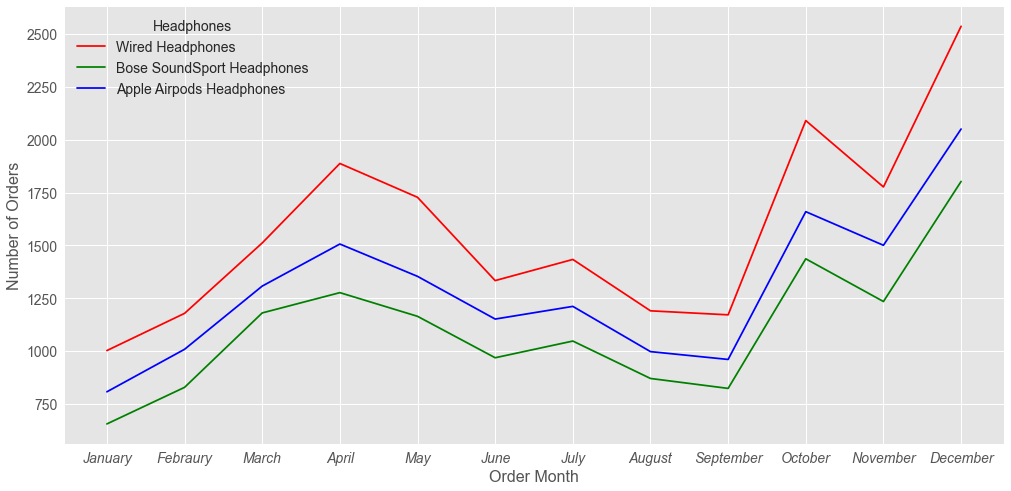

In [908]:
df_clean.loc[df_clean.Product=='Wired Headphones'].groupby(['Order Month'])['Order ID'].count().plot(kind='line',color = 'r')
df_clean.loc[df_clean.Product=='Bose SoundSport Headphones'].groupby(['Order Month'])['Order ID'].count().plot(kind='line',color = 'g')
df_clean.loc[df_clean.Product=='Apple Airpods Headphones'].groupby(['Order Month'])['Order ID'].count().plot(kind='line',color = 'b')
plt.xticks(np.arange(0,12,1),labels=['January','Febraury','March','April','May','June','July','August','September','October','November','December'],fontstyle = 'oblique')
plt.legend(title = 'Headphones',labels=['Wired Headphones','Bose SoundSport Headphones','Apple Airpods Headphones'])
plt.ylabel('Number of Orders')
plt.show()


## **Research Question 14: Which laptop is the most popular to be ordered?**

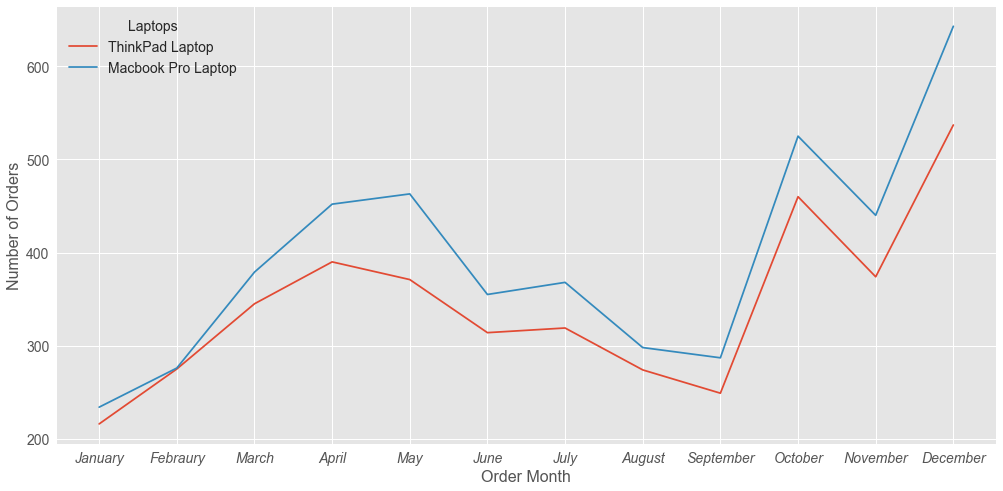

In [907]:
df_clean.loc[df_clean.Product=='ThinkPad Laptop'].groupby(['Order Month'])['Order ID'].count().plot(kind='line')
df_clean.loc[df_clean.Product=='Macbook Pro Laptop'].groupby(['Order Month'])['Order ID'].count().plot(kind='line')
plt.xticks(np.arange(0,12,1),labels=['January','Febraury','March','April','May','June','July','August','September','October','November','December'],fontstyle = 'oblique')
plt.legend(title = 'Laptops',labels=['ThinkPad Laptop','Macbook Pro Laptop'])
plt.ylabel('Number of Orders')
plt.show()


# **Stage 4: Results and Conclusion**